In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#dataset
!wget https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip

#unzip dataset
!unzip "/content/brain_tumor data set.zip"
!rm "/content/brain_tumor data set.zip" 

--2023-04-09 06:00:04--  https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip [following]
--2023-04-09 06:00:05--  https://www.dropbox.com/s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce56c702cd4fd2be61af8ca05ff.dl.dropboxusercontent.com/cd/0/inline/B51UScQVeIb0K2rWcRK1np9xtoaQXp_16qc6mm6RiKym3CF8lwP8-aqjl03SHmNLnGn3zYZtEBFOnanmn5KoUjkT-Zhsxn-Lrdyv-w3NtKKn7V3qKuso1Uw4e_8gpdYo7WqwG6vjv7XNFNHGlPUw-SF3e-MofI-FP6475wOuyN0XtQ/file# [following]
--2023-04-09 06:00:05--  https://uce56c702cd4fd2be61af8ca05ff.dl.dropboxusercontent.com/cd/0/inline/B51UScQVeIb0K2rWcRK1np9xtoaQXp_1

In [ ]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
import imutils
import cv2

In [ ]:
# count the number of images
ROOT_DIR="/content/Brain Tumor Data Set" 
num_of_images ={}  
for dir in os.listdir(ROOT_DIR):
  num_of_images[dir]= len(os.listdir(os.path.join(ROOT_DIR, dir)))
num_of_images

{'Healthey': 2087, 'Brain Tumor': 2513}

We split our data such we have

* 70% for train data
* 15% for Validation
* 15 % for testing

In [ ]:
# we create training folder
if not os.path.exists("./train"):
  os.mkdir("./train")
  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)), size=(math.floor(70/100*num_of_images[dir])-5), replace=False):
      O=os.path.join(ROOT_DIR,dir,img)
      D= os.path.join('./train', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Train Folder exsist")

In [ ]:
#we create validation folder
if not os.path.exists("./val"):
   os.mkdir("./val")
   for dir in os.listdir (ROOT_DIR):
     os.makedirs("./val/"+dir)
     for img in np.random.choice (a=os.listdir (os.path.join(ROOT_DIR, dir) ),size= (math.floor (15/100*num_of_images [dir])-5), replace=False ):
       O = os.path.join(ROOT_DIR, dir, img)
       D= os.path.join('./val', dir)
       shutil.copy(O,D)
       os.remove(O)
else:
  print("Train Folder exsist")

In [ ]:
# we create testing folder
if not os.path.exists("./test"):
  os.mkdir("./test")
  for dir in os.listdir (ROOT_DIR):
    os.makedirs("./test/"+dir)
    for img in np.random. choice (a=os.listdir (os.path.join(ROOT_DIR, dir)),size= (math.floor(15/100* num_of_images [dir])-5), replace=False ):
      O= os.path.join(ROOT_DIR, dir, img)
      D= os.path.join('./test', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Train Folder exsist")

Lets build our model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, MaxPooling2D, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing import image
import keras

In [ ]:
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout (rate=0.25))
model.add(Dense (units=1, activation='sigmoid'))
model.compile(loss= keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

Train our model

In [ ]:
train_datagen = image.ImageDataGenerator( 
zoom_range = 0.2, shear_range =  0.2, rescale = 1./255, horizontal_flip=True)
val_datagen = image.ImageDataGenerator (rescale = 1./255)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_datagen.flow_from_directory (directory="/content/train", target_size=(224,224), batch_size=32, class_mode= 'binary')

Found 3209 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}

In [ ]:
val_data = val_datagen.flow_from_directory (directory="/content/val", target_size=(224,224), batch_size=32, class_mode = 'binary')

Found 679 images belonging to 2 classes.


In [ ]:
test_data = test_datagen.flow_from_directory (directory="/content/test", target_size=(224,224), batch_size=32, class_mode = 'binary')

Found 679 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es=EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

#model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

#putting call back in a list
call_back=[es,mc]

In [ ]:
hist = model.fit_generator(generator=train_data, steps_per_epoch= 8, epochs= 10, verbose= 1,validation_data= val_data,validation_steps= 16,callbacks = call_back)

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 0.7636 - accuracy: 0.5352
Epoch 1: val_accuracy improved from -inf to 0.67969, saving model to best_model.h5
8/8 [==============================] - 74s 9s/step - loss: 0.7636 - accuracy: 0.5352 - val_loss: 0.6675 - val_accuracy: 0.6797
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 0.6716 - accuracy: 0.6055
Epoch 2: val_accuracy improved from 0.67969 to 0.69141, saving model to best_model.h5
8/8 [==============================] - 93s 12s/step - loss: 0.6716 - accuracy: 0.6055 - val_loss: 0.6129 - val_accuracy: 0.6914
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.6589 - accuracy: 0.6406
Epoch 3: val_accuracy did not improve from 0.69141
8/8 [==============================] - 89s 12s/step - loss: 0.6589 - accuracy: 0.6406 - val_loss: 0.6028 - val_accuracy: 0.6543
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 0.6574 - accuracy: 0.6367
Epoch 4: val_accuracy improve

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
model=load_model("/content/best_model.h5")

Model Accuracy

In [ ]:
# checking out the accuracy of our model
acc = model.evaluate_generator (generator= test_data) [1]
print (f"The accuracy of your model is = {acc*100} %")

The accuracy of your model is = 78.4977912902832 %


In [ ]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

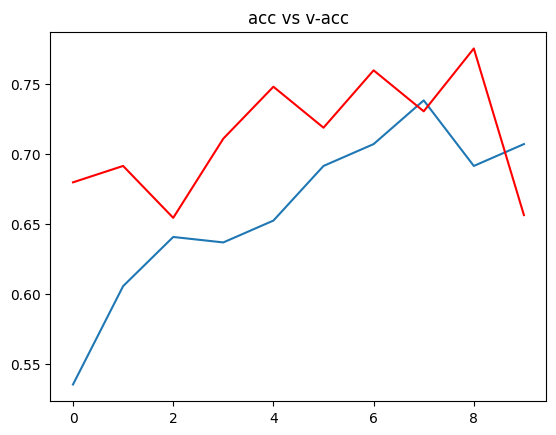

In [ ]:
plt.plot(h['accuracy']) 
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

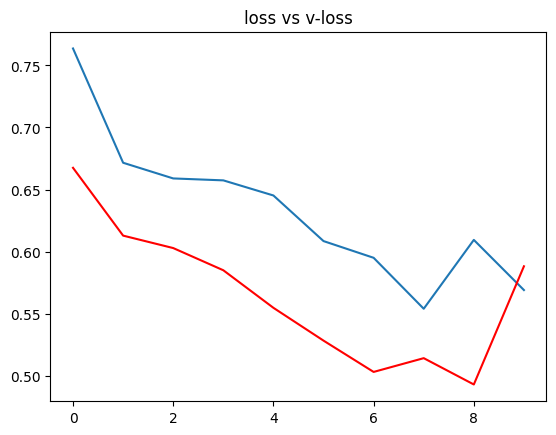

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# path for the image to see if it predics correct class
path="/content/val/Brain Tumor/Cancer (1006).jpg"
img = load_img(path, target_size=(224,224), )
i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred= model.predict(input_arr)[0][0]
print(pred)

if pred <0.5:
  print("The MRI image is of BRAIN TUMOR")
else:
  print("The MRI image is of Healthey brain")

1/1 [==============================] - 0s 64ms/step
0.1625326
The MRI image is of BRAIN TUMOR


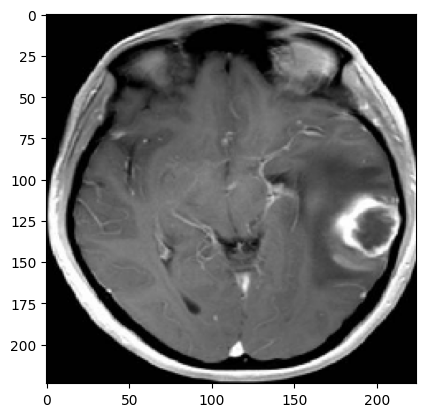

1/1 [==============================] - 0s 91ms/step
0.1625326
The MRI is having a Tumor


In [ ]:
path = "/content/val/Brain Tumor/Cancer (1006).jpg"
img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr.shape
input_arr = np.expand_dims (input_arr, axis= 0)
pred = model.predict (input_arr)[0][0]
print(pred)
if pred <0.5:
   print("The MRI is having a Tumor") 
else:
  print("The MRI is not having a Tumor")

# SVM

In [45]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
data_dir = "/content/Brain Tumor Data Set/Brain Tumor"
X = []
y = []

for img_file in os.listdir(data_dir):
    if img_file.endswith('.jpg'):
        img = cv2.imread(os.path.join(data_dir, img_file))
        img = cv2.resize(img, (64, 64))
        img = img.flatten()
        X.append(img)
        y.append(1)

data_dir = "/content/Brain Tumor Data Set/Healthey"
for img_file in os.listdir(data_dir):
    if img_file.endswith('.jpg'):
        img = cv2.imread(os.path.join(data_dir, img_file))
        img = cv2.resize(img, (64, 64))
        img = img.flatten()
        X.append(img)
        y.append(0)

# Preprocess the data
X = np.array(X) / 255
y = np.array(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm = SVC(kernel="linear", C=1, random_state=42)
svm.fit(X_train, y_train)

# Evaluate the model
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9413754227733935


In [58]:
# Predict using the model
new_img = cv2.imread("/content/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg")
new_img1 = cv2.resize(new_img, (64, 64))
new_img2 = new_img1.flatten()
new_img3 = np.array(new_img2) / 255
prediction = svm.predict([new_img3])
print(f"Prediction: {prediction}")

Prediction: [1]


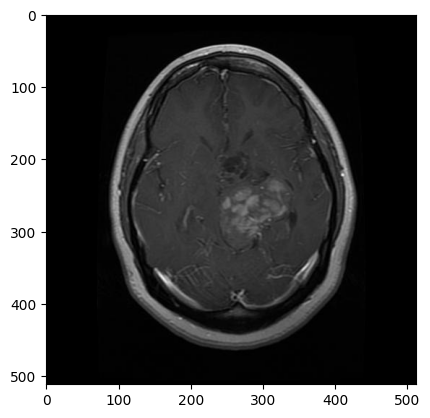

In [59]:
plt.imshow(new_img)

In [60]:
# Predict using the model
new_img = cv2.imread("/content/Brain Tumor Data Set/Healthey/Not Cancer  (100).jpg")
new_img1 = cv2.resize(new_img, (64, 64))
new_img2 = new_img1.flatten()
new_img3 = np.array(new_img2) / 255
prediction = svm.predict([new_img3])
print(f"Prediction: {prediction}")

Prediction: [0]


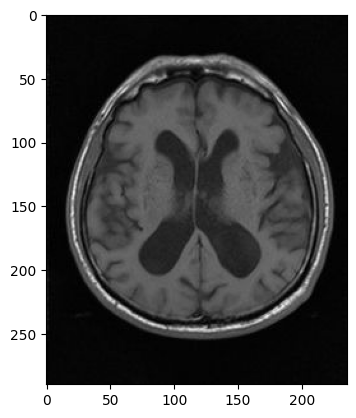

In [62]:
plt.imshow(new_img)
plt.show()

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Load the data
data_dir = "/content/Brain Tumor Data Set/Brain Tumor"
X = []
y = []

for img_file in os.listdir(data_dir):
    if img_file.endswith('.jpg'):
        img = cv2.imread(os.path.join(data_dir, img_file))
        img = cv2.resize(img, (64, 64))
        img = img.flatten()
        X.append(img)
        y.append(1)

data_dir = "/content/Brain Tumor Data Set/Healthey"
for img_file in os.listdir(data_dir):
    if img_file.endswith('.jpg'):
        img = cv2.imread(os.path.join(data_dir, img_file))
        img = cv2.resize(img, (64, 64))
        img = img.flatten()
        X.append(img)
        y.append(0)

# Preprocess the data
X = np.array(X) / 255
y = np.array(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9492671927846674


In [67]:
# Predict using the model
new_img = cv2.imread("/content/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg")
new_img1 = cv2.resize(new_img, (64, 64))
new_img2 = new_img1.flatten()
new_img3 = np.array(new_img2) / 255
prediction = svm.predict([new_img3])
print(f"Prediction: {prediction}")

Prediction: [1]


In [66]:
# Predict using the model
new_img = cv2.imread("/content/Brain Tumor Data Set/Healthey/Not Cancer  (100).jpg")
new_img1 = cv2.resize(new_img, (64, 64))
new_img2 = new_img1.flatten()
new_img3 = np.array(new_img2) / 255
prediction = rf.predict([new_img3])
print(f"Prediction: {prediction}")

Prediction: [0]


In [68]:
import plotly.graph_objs as go

# Define the data
model_names = ["CNN", "SVM", "Random Forest"]
accura = [74, 94.14, 94.93]

# Create the plotly figure
fig = go.Figure()

# Add the bar chart trace
fig.add_trace(go.Bar(
    x=model_names,
    y=accura,
    marker_color='darkblue',
    text=accura,
    textposition='auto'
))

# Update the layout
fig.update_layout(
    title="Accuracy Comparison of Different Models",
    xaxis_title="Model",
    yaxis_title="Accuracy (%)",
    font=dict(
        family="Arial",
        size=18,
        color="black"
    ),
    template='plotly_white'
)

# Show the plot
fig.show()
